In [215]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [216]:
df = pd.read_csv("IMDB Dataset.csv")
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [217]:
df['review'][0]

"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fa

In [218]:
import re

def checkPunctuation(text):
    pattern = '[@$%]'
    return re.search(pattern,text) is not None 

countPunctuations = 0

for index, row in df.iterrows():
    if checkPunctuation(row['review']):
        countPunctuations += 1

        if countPunctuations==1:
            print(row['review'])

print('Total number of rows having punctuations: ',countPunctuations)    

I bought this film at Blockbuster for $3.00, because it sounded interesting (a bit Ranma-esque, with the idea of someone dragging around a skeleton), because there was a cute girl in a mini-skirt on the back, and because there was a Restricted Viewing sticker on it. I thought it was going to be a sweet or at least sincere coming of age story with a weird indie edge. I was 100% wrong.<br /><br />Having watched it, I have to wonder how it got the restricted sticker, since there is hardly any foul language, little violence, and the closest thing to nudity (Honestly! I don't usually go around hoping for it!) is when the girl is in her nightgown and you see her panties (you see her panties a lot in this movie, because no matter what, she's wearing a miniskirt of some sort). Even the anti-religious humor is tame (and lame, caricatured, insincere, derivative, unoriginal, and worst of all not funny in the slightest--it would be better just to listen to Ray Stevens' "Would Jesus Wear a Rolex on

### Information about the data

In [219]:
df.shape


(50000, 2)

In [220]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [221]:
# Checking the missing values
df.isnull().sum()

review       0
sentiment    0
dtype: int64

In [222]:
# Checking the duplicates
df.duplicated().sum()

418

#### There are 418 duplicates in the data set and it is around 0.8% of the dataset so i am dropping the duplicate values.

In [223]:
df =  df.drop_duplicates()

In [224]:
df.shape

(49582, 2)

In [225]:
df['sentiment'].value_counts()

sentiment
positive    24884
negative    24698
Name: count, dtype: int64

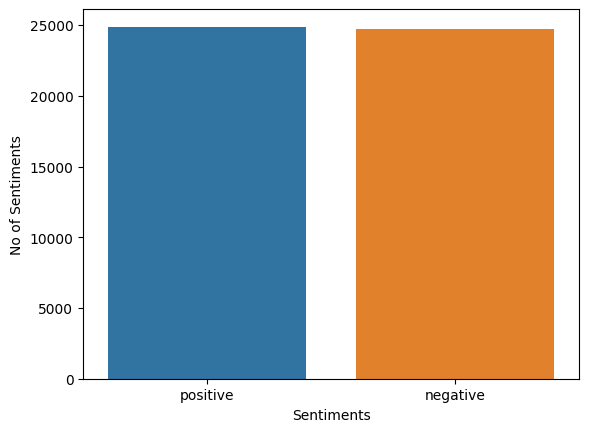

In [226]:
sns.countplot(x=df['sentiment'],hue='sentiment', data=df)
plt.xlabel('Sentiments')
plt.ylabel('No of Sentiments')
plt.show()

### Preprocessing

In [227]:
# Removing tags
import re
def remove_tags(raw_text):
    cleaned_text = re.sub(re.compile('<.*?>'), '', raw_text)
    return cleaned_text


In [228]:
df['review'] = df['review'].apply(remove_tags)
df['review'].head(5)

0    One of the other reviewers has mentioned that ...
1    A wonderful little production. The filming tec...
2    I thought this was a wonderful way to spend ti...
3    Basically there's a family where a little boy ...
4    Petter Mattei's "Love in the Time of Money" is...
Name: review, dtype: object

In [229]:
# Converting review column into lower case
df['review']  = df['review'].apply(lambda x: x.lower())
df['review'].head()

0    one of the other reviewers has mentioned that ...
1    a wonderful little production. the filming tec...
2    i thought this was a wonderful way to spend ti...
3    basically there's a family where a little boy ...
4    petter mattei's "love in the time of money" is...
Name: review, dtype: object

In [230]:
import re

def checkPunctuation(text):
    pattern = '[@$%]'
    return re.search(pattern,text) is not None 

countPunctuations = 0

for index, row in df.iterrows():
    if checkPunctuation(row['review']):
        countPunctuations += 1

        if countPunctuations==1:
            print(row['review'])
            print('The index of the sentiment is : ', index)
            
print('Total number of sentiments having punctuations: ',countPunctuations)    

i bought this film at blockbuster for $3.00, because it sounded interesting (a bit ranma-esque, with the idea of someone dragging around a skeleton), because there was a cute girl in a mini-skirt on the back, and because there was a restricted viewing sticker on it. i thought it was going to be a sweet or at least sincere coming of age story with a weird indie edge. i was 100% wrong.having watched it, i have to wonder how it got the restricted sticker, since there is hardly any foul language, little violence, and the closest thing to nudity (honestly! i don't usually go around hoping for it!) is when the girl is in her nightgown and you see her panties (you see her panties a lot in this movie, because no matter what, she's wearing a miniskirt of some sort). even the anti-religious humor is tame (and lame, caricatured, insincere, derivative, unoriginal, and worst of all not funny in the slightest--it would be better just to listen to ray stevens' "would jesus wear a rolex on his televis

In [231]:
def preprocess(q):
    
    q = str(q).lower().strip()
    
    # Replace certain special characters with their string equivalents
    q = q.replace('%', ' percent')
    q = q.replace('$', ' dollar ')
    q = q.replace('₹', ' rupee ')
    q = q.replace('€', ' euro ')
    q = q.replace('@', ' at ')
    return q

df['review'] = df['review'].apply(preprocess)

### Decontractig words

In [232]:
from bs4 import BeautifulSoup
  # Decontracting words
    # https://en.wikipedia.org/wiki/Wikipedia%3aList_of_English_contractions
    # https://stackoverflow.com/a/19794953
q = str().lower().strip()
contractions = { 
    "ain't": "am not",
    "aren't": "are not",
    "can't": "can not",
    "can't've": "can not have",
    "'cause": "because",
    "could've": "could have",
    "couldn't": "could not",
    "couldn't've": "could not have",
    "didn't": "did not",
    "doesn't": "does not",
    "don't": "do not",
    "hadn't": "had not",
    "hadn't've": "had not have",
    "hasn't": "has not",
    "haven't": "have not",
    "he'd": "he would",
    "he'd've": "he would have",
    "he'll": "he will",
    "he'll've": "he will have",
    "he's": "he is",
    "how'd": "how did",
    "how'd'y": "how do you",
    "how'll": "how will",
    "how's": "how is",
    "i'd": "i would",
    "i'd've": "i would have",
    "i'll": "i will",
    "i'll've": "i will have",
    "i'm": "i am",
    "i've": "i have",
    "isn't": "is not",
    "it'd": "it would",
    "it'd've": "it would have",
    "it'll": "it will",
    "it'll've": "it will have",
    "it's": "it is",
    "let's": "let us",
    "ma'am": "madam",
    "mayn't": "may not",
    "might've": "might have",
    "mightn't": "might not",
    "mightn't've": "might not have",
    "must've": "must have",
    "mustn't": "must not",
    "mustn't've": "must not have",
    "needn't": "need not",
    "needn't've": "need not have",
    "o'clock": "of the clock",
    "oughtn't": "ought not",
    "oughtn't've": "ought not have",
    "shan't": "shall not",
    "sha'n't": "shall not",
    "shan't've": "shall not have",
    "she'd": "she would",
    "she'd've": "she would have",
    "she'll": "she will",
    "she'll've": "she will have",
    "she's": "she is",
    "should've": "should have",
    "shouldn't": "should not",
    "shouldn't've": "should not have",
    "so've": "so have",
    "so's": "so as",
    "that'd": "that would",
    "that'd've": "that would have",
    "that's": "that is",
    "there'd": "there would",
    "there'd've": "there would have",
    "there's": "there is",
    "they'd": "they would",
    "they'd've": "they would have",
    "they'll": "they will",
    "they'll've": "they will have",
    "they're": "they are",
    "they've": "they have",
    "to've": "to have",
    "wasn't": "was not",
    "we'd": "we would",
    "we'd've": "we would have",
    "we'll": "we will",
    "we'll've": "we will have",
    "we're": "we are",
    "we've": "we have",
    "weren't": "were not",
    "what'll": "what will",
    "what'll've": "what will have",
    "what're": "what are",
    "what's": "what is",
    "what've": "what have",
    "when's": "when is",
    "when've": "when have",
    "where'd": "where did",
    "where's": "where is",
    "where've": "where have",
    "who'll": "who will",
    "who'll've": "who will have",
    "who's": "who is",
    "who've": "who have",
    "why's": "why is",
    "why've": "why have",
    "will've": "will have",
    "won't": "will not",
    "won't've": "will not have",
    "would've": "would have",
    "wouldn't": "would not",
    "wouldn't've": "would not have",
    "y'all": "you all",
    "y'all'd": "you all would",
    "y'all'd've": "you all would have",
    "y'all're": "you all are",
    "y'all've": "you all have",
    "you'd": "you would",
    "you'd've": "you would have",
    "you'll": "you will",
    "you'll've": "you will have",
    "you're": "you are",
    "you've": "you have"
    }

def decontract(q):
    q = str(q).lower().strip()    
    q_decontracted = []
    for word in q.split():
        if word in contractions:
            word = contractions[word]

        q_decontracted.append(word)

    q = ' '.join(q_decontracted)
    q = q.replace("'ve", " have")
    q = q.replace("n't", " not")
    q = q.replace("'re", " are")
    q = q.replace("'ll", " will")
        
    # Removing HTML tags
    q = BeautifulSoup(q)
    q = q.get_text()
        
    # Remove punctuations
    pattern = re.compile('\W')
    q = re.sub(pattern, ' ', q).strip()
    
    
    return q
df['review'] = df['review'].apply(decontract)

C:\Users\User\AppData\Local\Temp\ipykernel_216\770181545.py:142: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  q = BeautifulSoup(q)


In [233]:
print(df['review'][3])

basically there is a family where a little boy  jake  thinks there is a zombie in his closet   his parents are fighting all the time this movie is slower than a soap opera    and suddenly  jake decides to become rambo and kill the zombie ok  first of all when you are going to make a film you must decide if its a thriller or a drama  as a drama the movie is watchable  parents are divorcing   arguing like in real life  and then we have jake with his closet which totally ruins all the film  i expected to see a boogeyman similar movie  and instead i watched a drama with some meaningless thriller spots 3 out of 10 just for the well playing parents   descent dialogs  as for the shots with jake  just ignore them


In [234]:
print(df['review'][35])

i bought this film at blockbuster for dollar 3 00  because it sounded interesting  a bit ranma esque  with the idea of someone dragging around a skeleton   because there was a cute girl in a mini skirt on the back  and because there was a restricted viewing sticker on it  i thought it was going to be a sweet or at least sincere coming of age story with a weird indie edge  i was 100 percent wrong having watched it  i have to wonder how it got the restricted sticker  since there is hardly any foul language  little violence  and the closest thing to nudity  honestly  i do not usually go around hoping for it   is when the girl is in her nightgown and you see her panties  you see her panties a lot in this movie  because no matter what  she is wearing a miniskirt of some sort   even the anti religious humor is tame  and lame  caricatured  insincere  derivative  unoriginal  and worst of all not funny in the slightest  it would be better just to listen to ray stevens   would jesus wear a rolex

In [235]:
# Removing Stop Words
from nltk.corpus import stopwords

sw_list = stopwords.words('english')

df['review'] = df['review'].apply(lambda x: [item for item in x.split() if item not in sw_list]).apply(lambda x:" ".join(x))
df['review'][0]

'one reviewers mentioned watching 1 oz episode hooked right exactly happened first thing struck oz brutality unflinching scenes violence set right word go trust show faint hearted timid show pulls punches regards drugs sex violence hardcore classic use word called oz nickname given oswald maximum security state penitentary focuses mainly emerald city experimental section prison cells glass fronts face inwards privacy high agenda em city home many aryans muslims gangstas latinos christians italians irish scuffles death stares dodgy dealings shady agreements never far away would say main appeal show due fact goes shows would dare forget pretty pictures painted mainstream audiences forget charm forget romance oz mess around first episode ever saw struck nasty surreal could say ready watched developed taste oz got accustomed high levels graphic violence violence injustice crooked guards sold nickel inmates kill order get away well mannered middle class inmates turned prison bitches due lac

In [236]:

def checkurl(text):
    pattern = 'https://\S+|www\.\S+'
    return re.search(pattern,text) is not None 

counturl = 0

for index, row in df.iterrows():
    if checkurl(row['review']):
        counturl += 1

        if counturl==1:
            print(row['review'])
            print(index)
            
print('Total number of sentiments having url: ',counturl)
    

Total number of sentiments having url:  0


In [237]:
# Remove Urls
def remove_url(data):
    url_clean= re.compile(r"https://\S+|www\.\S+")
    data=url_clean.sub(r'',data)
    return data
df['review'] = df['review'].apply(lambda x: remove_url(x))

In [238]:
# Removing emojis
def remove_emoji(data):
    emoji_clean= re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    data=emoji_clean.sub(r'',data)
    url_clean= re.compile(r"https://\S+|www\.\S+")
    data=url_clean.sub(r'',data)
    return data
df['review'] = df['review'].apply(lambda x: remove_emoji(x))

In [239]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [240]:
df.head(10)

,review,sentiment
0,one reviewers mentioned watching 1 oz episode ...,positive
1,wonderful little production filming technique ...,positive
2,thought wonderful way spend time hot summer we...,positive
3,basically family little boy jake thinks zombie...,negative
4,petter mattei love time money visually stunnin...,positive
5,probably time favorite movie story selflessnes...,positive
6,sure would like see resurrection dated seahunt...,positive
7,show amazing fresh innovative idea 70 first ai...,negative
8,encouraged positive comments film looking forw...,negative
9,like original gut wrenching laughter like movi...,positive


In [241]:
#Lemmatize the dataset
from nltk.stem import WordNetLemmatizer


def lemma_corpus(data):
    lemmatizer=WordNetLemmatizer()
    out_data=""
    for words in data:
        out_data+= lemmatizer.lemmatize(words)
    return out_data

df['review']=df['review'].apply(lambda z: lemma_corpus(z))
print(df['review'].head(10))

0    one reviewers mentioned watching 1 oz episode ...
1    wonderful little production filming technique ...
2    thought wonderful way spend time hot summer we...
3    basically family little boy jake thinks zombie...
4    petter mattei love time money visually stunnin...
5    probably time favorite movie story selflessnes...
6    sure would like see resurrection dated seahunt...
7    show amazing fresh innovative idea 70 first ai...
8    encouraged positive comments film looking forw...
9    like original gut wrenching laughter like movi...
Name: review, dtype: object


In [146]:
df.to_csv('Cleaned.csv', index=False)

### Training the model 

In [31]:
X = df['review']
y = df['sentiment']

In [32]:
X

0        one reviewers mentioned watching 1 oz episode ...
1        wonderful little production filming technique ...
2        thought wonderful way spend time hot summer we...
3        basically family little boy jake thinks zombie...
4        petter mattei love time money visually stunnin...
                               ...                        
49995    thought movie right good job creative original...
49996    bad plot bad dialogue bad acting idiotic direc...
49997    catholic taught parochial elementary schools n...
49998    going disagree previous comment side maltin on...
49999    one expects star trek movies high art fans exp...
Name: review, Length: 49582, dtype: object

In [33]:
y

0        positive
1        positive
2        positive
3        negative
4        positive
           ...   
49995    positive
49996    negative
49997    negative
49998    negative
49999    negative
Name: sentiment, Length: 49582, dtype: object

In [34]:
y.shape

(49582,)

In [35]:
X.shape

(49582,)

In [97]:
import wordcloud

In [99]:

from wordcloud import WordCloud

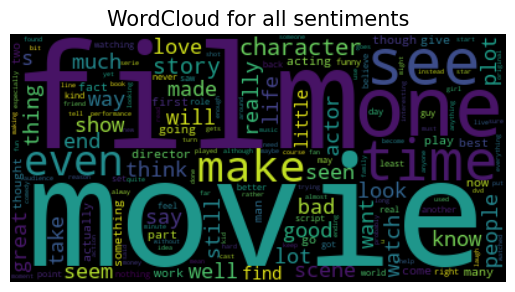

In [117]:
text=" ".join(df["review"])
wordcloud=WordCloud().generate(text)
plt.imshow(wordcloud,interpolation="bilinear")
plt.title('WordCloud for all sentiments', fontsize=15)
plt.axis("off")
plt.show()

In [118]:
senti_positive=df[df['sentiment']=="positive"]["review"]
senti_positive

0        one of the other reviewers has mentioned that ...
1        a wonderful little production  the filming tec...
2        i thought this was a wonderful way to spend ti...
4        petter mattei s  love in the time of money  is...
5        probably my all time favorite movie  a story o...
                               ...                        
49983    i loved it  having been a fan of the original ...
49985    imaginary heroes is clearly the best film of t...
49989    i got this one a few weeks ago and love it  it...
49992    john garfield plays a marine who is blinded by...
49995    i thought this movie did a down right good job...
Name: review, Length: 25000, dtype: object

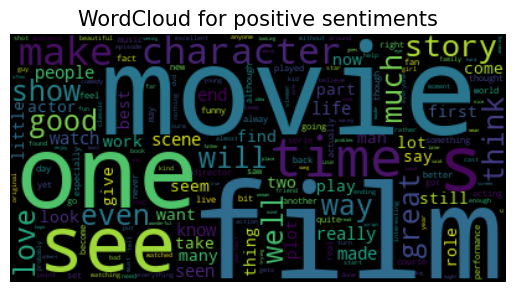

In [119]:
text=" ".join(senti_positive)
wordcloud=WordCloud().generate(text)
plt.imshow(wordcloud,interpolation="bilinear")
plt.title('WordCloud for positive sentiments', fontsize=15)
plt.axis("off")
plt.show()

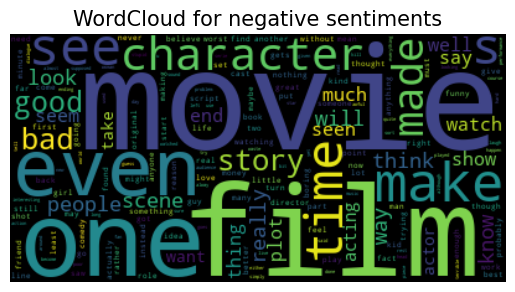

In [123]:
senti_neg=df[df['sentiment']=="negative"]["review"]
text=" ".join(senti_neg)
wordcloud=WordCloud().generate(text)
plt.imshow(wordcloud,interpolation="bilinear")
plt.title('WordCloud for negative sentiments', fontsize=15)
plt.axis("off")
plt.show()

### Label encoding of y

In [36]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
y = encoder.fit_transform(y)

In [37]:
y

array([1, 1, 1, ..., 0, 0, 0])

In [38]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [39]:
X_train.shape

(39665,)

In [40]:
X_test.shape

(9917,)

In [41]:
y_train.shape

(39665,)

In [42]:
y_test.shape

(9917,)

### Bag of Words

In [43]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [44]:
X_train_bow = cv.fit_transform(X_train).toarray()

X_test_bow = cv.transform(X_test).toarray()

In [45]:
X_train_bow.shape

(39665, 94604)

In [46]:
X_test_bow.shape

(9917, 94604)

#### Gaussian Naive Bayes

In [47]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train_bow,y_train)

GaussianNB()

In [48]:
y_pred = gnb.predict(X_test_bow)

In [128]:
from sklearn.metrics import confusion_matrix , accuracy_score, classification_report
print( 'The accuracy score is :', accuracy_score(y_test, y_pred))
print(' The classification reoprt is :','\n', classification_report(y_test, y_pred))

The accuracy score is : 0.753453665423011
 The classification reoprt is : 
               precision    recall  f1-score   support

           0       0.82      0.65      0.72      4939
           1       0.71      0.86      0.78      4978

    accuracy                           0.75      9917
   macro avg       0.76      0.75      0.75      9917
weighted avg       0.76      0.75      0.75      9917



In [50]:
print('The confusion matrix is :','\n', confusion_matrix(y_test,y_pred))

The confusion matrix is : 
 [[4008  931]
 [2631 2347]]


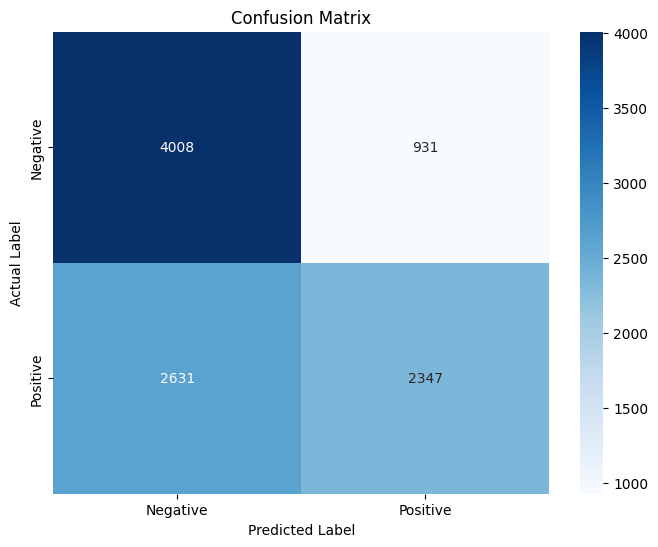

In [51]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.title("Confusion Matrix")
plt.ylabel("Actual Label")
plt.xlabel("Predicted Label")
plt.show()

#### Random Forest Classifier

In [53]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc.fit(X_train_bow, y_train)

RandomForestClassifier()

In [133]:
y_pred = rfc.predict(X_test_bow)


from sklearn.metrics import confusion_matrix , accuracy_score, classification_report

In [134]:
print('The confusion matrix is :', '\n', confusion_matrix(y_test, y_pred))
print('The accuracy score is :', accuracy_score(y_test, y_pred))
print('The classifcation report is :', '\n', classification_report(y_test, y_pred))

The confusion matrix is : 
 [[4216  723]
 [ 717 4261]]
The accuracy score is : 0.8547947968135525
The classifcation report is : 
               precision    recall  f1-score   support

           0       0.85      0.85      0.85      4939
           1       0.85      0.86      0.86      4978

    accuracy                           0.85      9917
   macro avg       0.85      0.85      0.85      9917
weighted avg       0.85      0.85      0.85      9917



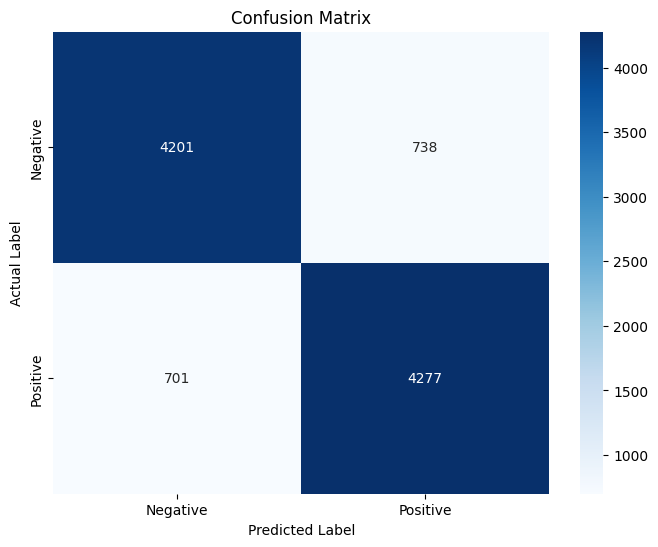

In [56]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.title("Confusion Matrix")
plt.ylabel("Actual Label")
plt.xlabel("Predicted Label")
plt.show()

In [126]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc.fit(X_train_bow, y_train)

RandomForestClassifier()

### TF-IDF

In [62]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf = TfidfVectorizer()

In [63]:
X_train_tf = tf.fit_transform(X_train).toarray()
X_test_tf  =  tf.transform(X_test).toarray()

In [64]:
X_train_tf

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [65]:
X_train_tf.shape

(39665, 94604)

In [60]:
X_test_tf

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [61]:
X_test.shape

(9917,)

In [62]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc.fit(X_train_tf, y_train)

RandomForestClassifier()

In [135]:
y_pred = rfc.predict(X_test_tf)

from  sklearn.metrics import confusion_matrix , accuracy_score, classification_report
print('The confusion matrix is :','\n', confusion_matrix(y_test, y_pred))
print('The accuracy score is :', '\n', accuracy_score(y_test, y_pred))
print('The classification report is :','\n', classification_report(y_test, y_pred))

The confusion matrix is : 
 [[  34 4905]
 [   8 4970]]
The accuracy score is : 
 0.5045880810729051
The classification report is : 
               precision    recall  f1-score   support

           0       0.81      0.01      0.01      4939
           1       0.50      1.00      0.67      4978

    accuracy                           0.50      9917
   macro avg       0.66      0.50      0.34      9917
weighted avg       0.66      0.50      0.34      9917



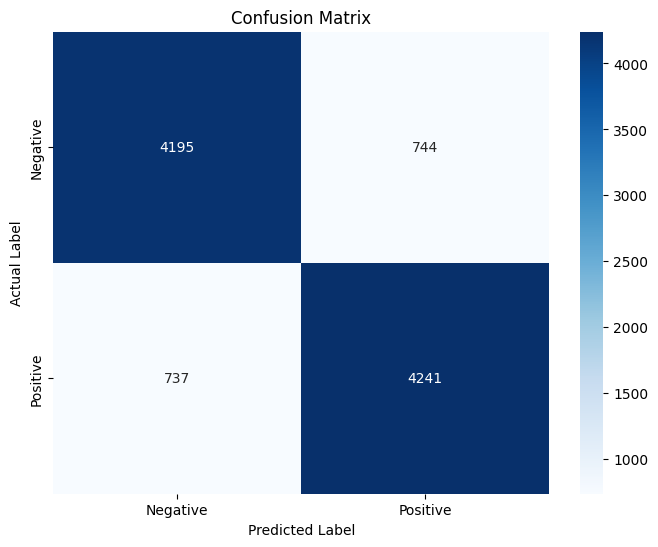

In [64]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.title("Confusion Matrix")
plt.ylabel("Actual Label")
plt.xlabel("Predicted Label")
plt.show()

Logistic Regression

In [137]:
from sklearn.linear_model import LogisticRegression

In [67]:
lr = LogisticRegression(random_state=0)
lr.fit(X_train_bow, y_train)


c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

In [68]:
y_pred = lr.predict(X_test_bow)

In [141]:
print('The confusion matrix is :','\n', confusion_matrix(y_test, y_pred))
print('The accuracy score is :', '\n', accuracy_score(y_test, y_pred))
print('The classification report is : ', '\n', classification_report(y_test, y_pred))

The confusion matrix is : 
 [[4349  590]
 [ 431 4547]]
The accuracy score is : 
 0.8970454774629424
The classification report is :  
               precision    recall  f1-score   support

           0       0.91      0.88      0.89      4939
           1       0.89      0.91      0.90      4978

    accuracy                           0.90      9917
   macro avg       0.90      0.90      0.90      9917
weighted avg       0.90      0.90      0.90      9917



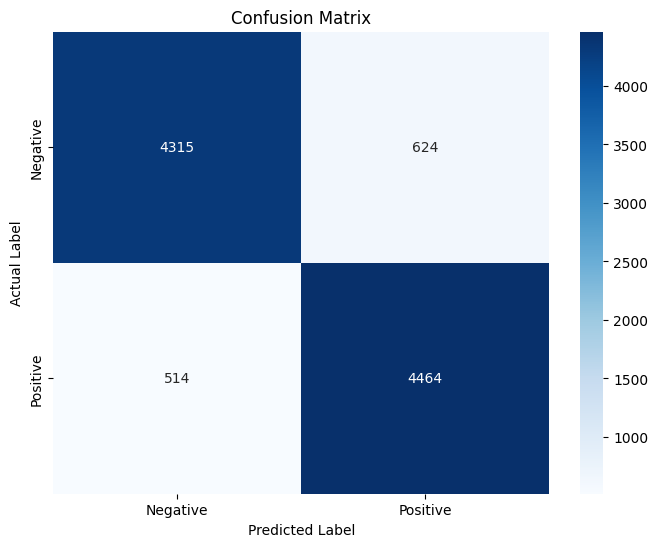

In [ ]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.title("Confusion Matrix")
plt.ylabel("Actual Label")
plt.xlabel("Predicted Label")
plt.show()

In [138]:
lr = LogisticRegression(random_state=0)
lr.fit(X_train_tf, y_train)

y_pred = lr.predict(X_test_tf)

In [139]:
print('The confusion matrix is :','\n', confusion_matrix(y_test, y_pred))
print('The accuracy score is :', '\n', accuracy_score(y_test, y_pred))
print('The classification report is : ', '\n', classification_report(y_test, y_pred))

The confusion matrix is : 
 [[4349  590]
 [ 431 4547]]
The accuracy score is : 
 0.8970454774629424
The classification report is :  
               precision    recall  f1-score   support

           0       0.91      0.88      0.89      4939
           1       0.89      0.91      0.90      4978

    accuracy                           0.90      9917
   macro avg       0.90      0.90      0.90      9917
weighted avg       0.90      0.90      0.90      9917



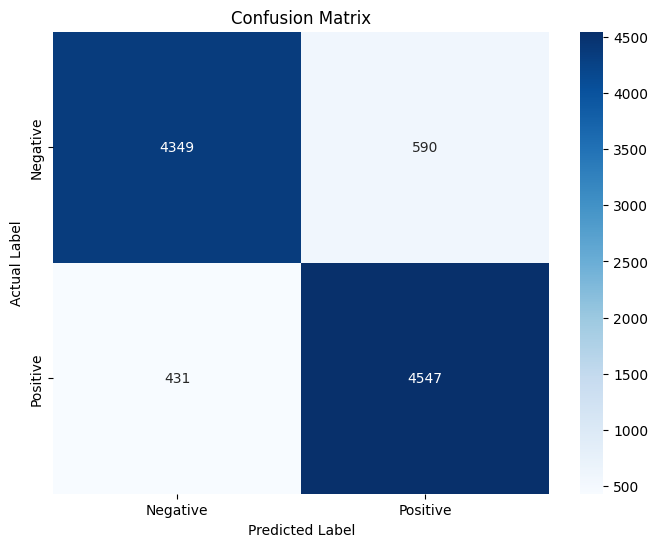

In [140]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.title("Confusion Matrix")
plt.ylabel("Actual Label")
plt.xlabel("Predicted Label")
plt.show()

## XG Boost

In [57]:
from sklearn.ensemble import GradientBoostingClassifier

gbtree = GradientBoostingClassifier(learning_rate=0.1, max_depth=1 , random_state=42)
 
gbtree.fit(X_train_bow,y_train)

GradientBoostingClassifier(max_depth=1, random_state=42)

In [148]:
y_pred = gbtree.predict(X_test_bow)

In [149]:
from  sklearn.metrics import confusion_matrix , accuracy_score, classification_report
print('The confusion matrix is :','\n', confusion_matrix(y_test, y_pred))
print('The accuracy score is :', '\n', accuracy_score(y_test, y_pred))
print('The classification report is :','\n', classification_report(y_test, y_pred))

The confusion matrix is : 
 [[3281 1658]
 [ 836 4142]]
The accuracy score is : 
 0.7485126550368055
The classification report is : 
               precision    recall  f1-score   support

           0       0.80      0.66      0.72      4939
           1       0.71      0.83      0.77      4978

    accuracy                           0.75      9917
   macro avg       0.76      0.75      0.75      9917
weighted avg       0.76      0.75      0.75      9917



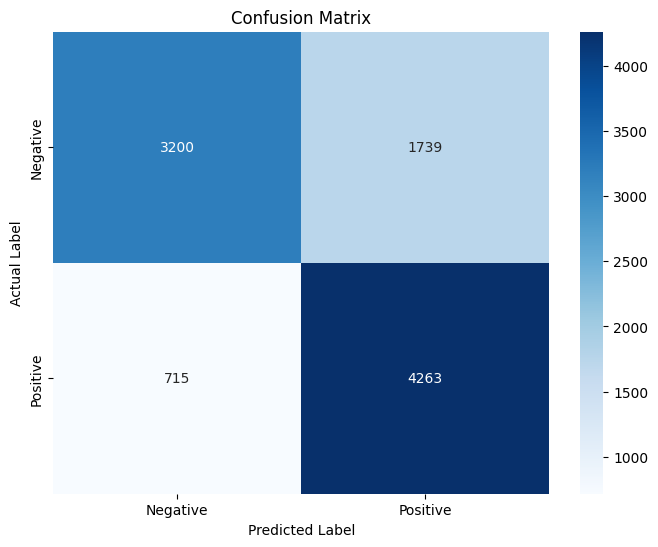

In [60]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.title("Confusion Matrix")
plt.ylabel("Actual Label")
plt.xlabel("Predicted Label")
plt.show()

In [66]:
from sklearn.ensemble import GradientBoostingClassifier

gbtree = GradientBoostingClassifier(learning_rate=0.1, max_depth=1 , random_state=42)
 
gbtree.fit(X_train_tf,y_train)

GradientBoostingClassifier(max_depth=1, random_state=42)

In [150]:
y_pred = gbtree.predict(X_test_tf)

In [151]:
from  sklearn.metrics import confusion_matrix , accuracy_score, classification_report
print('The confusion matrix is :','\n', confusion_matrix(y_test, y_pred))
print('The accuracy score is :', '\n', accuracy_score(y_test, y_pred))
print('The classification report is :','\n', classification_report(y_test, y_pred))

The confusion matrix is : 
 [[3210 1729]
 [ 716 4262]]
The accuracy score is : 
 0.753453665423011
The classification report is : 
               precision    recall  f1-score   support

           0       0.82      0.65      0.72      4939
           1       0.71      0.86      0.78      4978

    accuracy                           0.75      9917
   macro avg       0.76      0.75      0.75      9917
weighted avg       0.76      0.75      0.75      9917



Text(0.5, 36.72222222222221, 'Predicted Label')

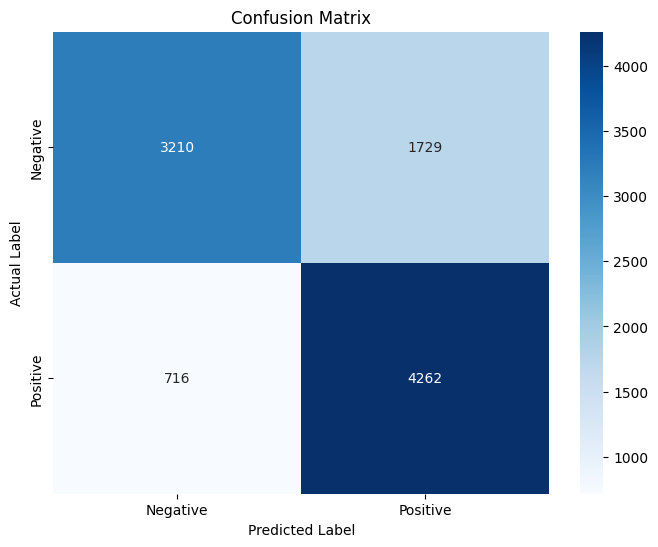

In [69]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.title("Confusion Matrix")
plt.ylabel("Actual Label")
plt.xlabel("Predicted Label")

In [162]:
import time

In [170]:
#we first create a dictionary of the required models.

def fit_models(X_train, X_test, y_train, y_test):

	# Making a list of ML Classifiers 

	classifiers = {'Logistic Regression Classifier':LogisticRegression(),
			   'Random Forest Classifier':RandomForestClassifier(),
			   'Gradient Boosting Classifier':GradientBoostingClassifier(),
			   'Bayes Classifier': GaussianNB()}
	
	# Making a list to store the model accurary rate scores
	Model_acc_score = [] 

	# Making a list to store model precision val
	model_precision_val = []

	# Making a list to store model recall
	model_recall_val = []

	# Making a list to store F1 score
	model_F1_score = []
		 
	# Making a index for containing the model names 
	index1 = []

	# Making a list to store time taken 
	time_taken = []

	# Using for loop to implement different machine learning models 
	for i in classifiers:

		begin = time.time()
		model = classifiers[i]
		model.fit(X_train,y_train)
		y_pred = model.predict(X_test)
		end = time.time()
		index1.append(i)
		Model_acc_score.append(accuracy_score(y_test,y_pred))
		model_precision_val.append(precision_score(y_test,y_pred))
		model_recall_val.append(recall_score(y_test,y_pred))
		model_F1_score.append(f1_score(y_test,y_pred))
		time_taken.append(end-begin)
	
	# Creating a Data Frame to contain the calculated valued for model accuracy, precision, recall and f1 score.
	table = pd.DataFrame(data = np.array([Model_acc_score,model_precision_val,model_recall_val,model_F1_score,time_taken]).T,
						 columns = ['Accuracy Score','Precision','Recall','F1','Time Taken'],index=index1)
	table.index.name = 'Models'
	table_sorted = table.sort_values(by='Accuracy Score', ascending=False)
	print(f'Total time taken is {sum(time_taken)}')
	return table_sorted

## Testing the model

In [186]:
sample_text = ["This movie was a great watch with brilliant performances and a gripping plot!",  "An absolute waste of time, the worst movie I've seen in a long while."]


for text in sample_text:
    # Convert the text to TF-IDF features
    sample_tfidf = tf.transform([text])


    # Make a prediction
    prediction_prob = lr.predict_proba(sample_tfidf)

    # Get the predicted probability of the positive class
    positive_prob = prediction_prob[0, 1]

    # Apply threshold to convert probabilities to class labels
    prediction = 1 if positive_prob > 0.5 else 0

    # Output the prediction
    sentiment = "Positive" if prediction == 1 else "Negative"
    print(f"{text} :  {sentiment}")
    # print(f"Predicted sentiment: {sentiment}")

This movie was a great watch with brilliant performances and a gripping plot! :  Positive
An absolute waste of time, the worst movie I've seen in a long while. :  Negative
